## Length of the report {-}

## DONT FORGET TO DELETE THIS
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix, references, and information about GitHub and individual contribution will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Code should be put separately in the code template {-}

## DONT FORGET TO DELETE THIS
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

**Delete this section from the report, when using this template.** 

## Background / Motivation

As college students, we are eager to know the return of schooling. Our project aims to address the common questions that college students have regarding the value of education and work experience in relation to future earnings. We aim to provide insight into whether earning a college degree will lead to higher earnings, or if gaining work experience immediately after high school graduation is more beneficial. Additionally, we seek to explore whether a person's intelligence plays a role in their future earnings or if legacy matters a lot, if a person's mother's education level is a reliable predictor of future financial success.

These are complex issues that require careful examination and analysis. By examining the relationship between these factors and future earnings, we hope to provide evidence-based answers to these questions and we hope to gain a better understanding of the factors that contribute to success in the workforce. Our aim is to provide information and insights that can help individuals, schools, employers, and the government to make informed decisions about people's education and career paths.

## Problem statement 

We want to know what aspects of human capital contribute to people's future success - measured in future earnings in this case.

## Data sources

The data we are using is from the National Longitudinal Survey of US Bureau of Labor. Here is the link of the source: https://www.bls.gov/nls/nlsy79.html.

We are using a subsample of young people aged between 28 and 38, with positive income (middle age young adults). We believe the data within this subset is not affected by hard-to-measure and inevitable history issues.

We have 7 things to look at in this survey.
1. AFQT: “Armed Forces Qualification Test”, a standardized test (similar to SAT or IQ test) given to everybody who was part of the survey in 1979. Scores are from 0 to 140.
2. Wage: Weekly wage, in dollars. 
3. Logwage:  Natural log of Wage.
4. Educ: Years of education
5. Exper: years of work experience
6. Meduc: Mother’s years of education
7. Age: age in years.


## Stakeholders

Our stakeholders are primarily young people and parents who are deciding how to allocate resources to maximize future earnings. We wish to identify which elements of human capital are most influential to predicting wages between education, experience, age, and AFQT. If we are successful, young people will have a clearer picture as to which characteristics are influential to future wages and which are not. For example, we might recomend that they prioritize experience over education and encourage that young people take opportunities to gain workforce experience over going to college.

Other stakeholders include employeers and the government. Employeers can use the significance of predictors to form better expectations of what wages they should pay people with particular characteristics. For example, they may consider an expected change in wage when workers gain experience or pursue further education. 

The government is the final stakeholder. In general, it can use significant predictor results to determine what areas of human capital to invest in to make certain populations better off. Consider a policy that increases education subsudies to minority communities to target their average wages, perhaps.

## Data quality check / cleaning / preparation 



The data was fully quantitative and contained no NaN or otherwise invalid values. Thus it was very complete upon initial importation and required minimal cleaning.

**Outlier analysis here?

## Exploratory data analysis

### Relationship Analysis
We begin our EDA by looking for strong relationships of predictors with Wage. Further, we begin to identify areas where predictor transformations may be necessary.

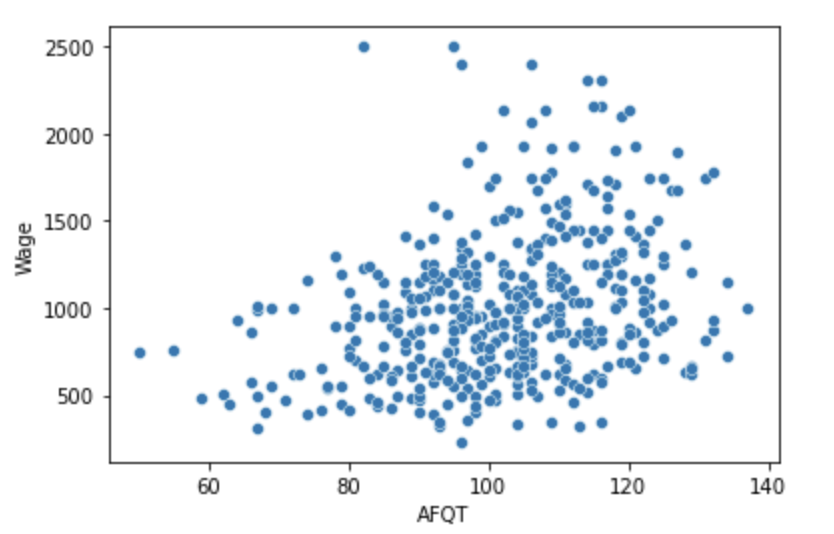

We observe:
- Profound quadratic relationship between Wage and AFQT
- Possible quadratic relationship between Wage and Educ

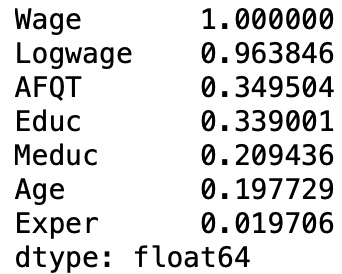

We observe strongest (and similar) correlations with Wage in:
- AFQT
- Educ

Also, we note that the correlations are particularly low. We contribite this to high variance in the Wage measurements for all predictors in the dataset.

To confirm the potential significance of the relationship of preditors with wage, we then develop a naive model with all linear predictors.

#### Wage~AFQT+Educ+Exper+Age+Meduc-1

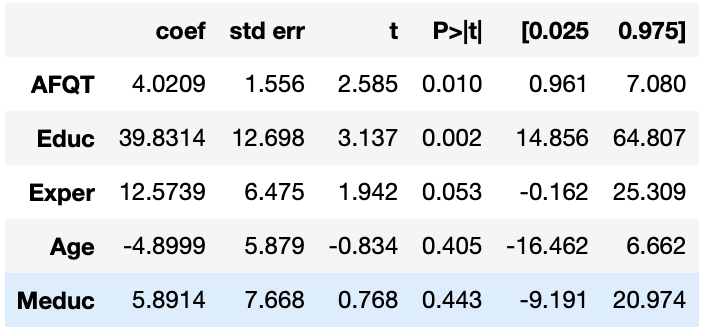

With some evidence of which predictors may be the most conductive to modeling wage, we now turn to analyzing how the predictors interact with eachother. 

Looking for correlations between predictors:
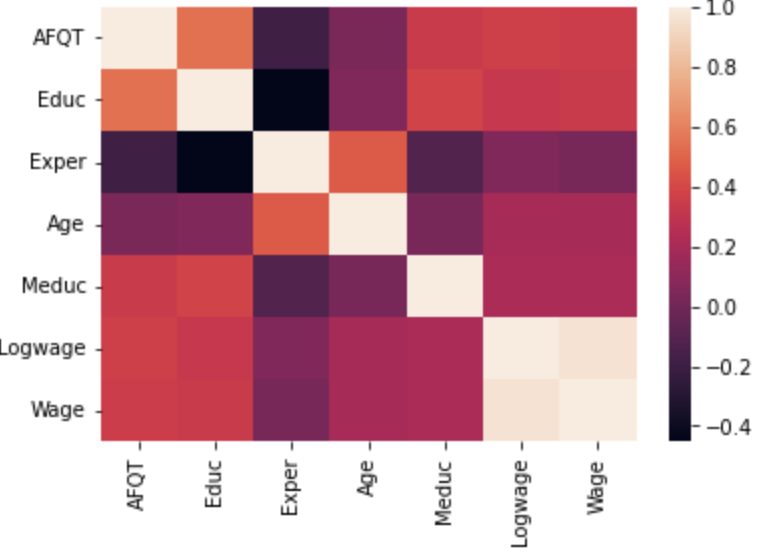

We see high correlations (>0.5) between: 
- Educ and AFQT
- Exper and Age

We then look for potential multicolinearity- described by VIF

VIF of constant is extremely high, which makes sense and we don't need further interpretation. 

VIFs of logwage and wage are high, this also makes as logwage is simply the log of wage. In our model, we should remove one of these two variables from the model.

Other than that, almost all VIFs are relatively close to 1, which means there is no severe multicollinearity.

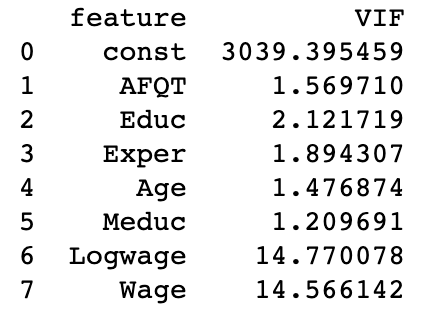

## Approach


We are using a multiple linear regression model to answer our problem statement. Since we were most interested in inference than prediction, our group decided to focus on optimizing the R-squared value in our final model. All predictors from our data seemed to be significant at first, just looking at the context of our data. We anticipated that we would have an issue with using some of the best subset or stepwise selection methods, given that all of our predictors may be significant for our model. Although these selection methods to create models did take a long time, we found these methods helpful for the creation of our final model. 

The very first model that we tried based on our EDA worked very well, with a high R-squared value. However, we wanted to further increase our R-squared value through model analysis. 

We did not find any solutions to our problems elsewhere on the internet. 

# Developing the model

#### Step 1: Initial Model
- The first step we took was to develop an initial model, based on our exploratory data analysis (EDA)
    - Looking at our naive model with all predictors and the predictors' correlation values with wage, we found that the predictors AFQT, Education, and Experience were significant for our model. We created our initial model including these 3 predictors. 
    - Additionally, we observed non-significant relationships with Wage in Age and Meduc. Exper is not significant at the 95% level but is significant at 94%, which is good enough for us to include in our model.
    - We also observed apparent non-linear trends with AFQT and Educ, so we decided to include a quadratic term of AFQT in our model. 

#### Step 2: RMSE Check

- Next, we checked the RMSE values for our initial model on the train and test datasets. 
    - RMSE train: 372.1630333735138
    - RMSE test: 414.8114189856499
        - We found that the train RMSE and test RMSE values are similar, which proves that our model does not overfit the data. 
        - The RMSE values are also relatively low, meaning our model is making fairly good predictions for the wage response variable. The model is performing well and generalizing to new data.

#### Step 3: Model Assumption Violations Check

- We then checked for model assumption violations. We did so by plotting the residuals vs. fitted values for the training and testing datasets. 
    - Non-linearity assumption: we found that the non-linearity assumption was met by looking at the residuals vs. fitted values plots. Shown below, our initial model seems to satisfy this assumption, as we do not observe a strong pattern in the residuals around the line Residuals = 0. Residuals are distributed more or less in a similar manner on both sides of the blue line for all fitted values. 
        - Given that the non-linearity model assumption is not violated, we can conclude that there is no need for further non-linear transformations of the predictors. 
    - Constant-variance assumption: we found that the constant-variance assumption was not completely met by looking at the residuals vs. fitted values plots. Shown below, we see that the variance of errors seems to increase constant with increase in the fitted values. 
        - Given that the constant variance model assumption is violated, we can transform the response variable, using log. The log transformation will result in a higher shrinkage of larger values.


#### Step 4: Outliers and Influential Points

- Next, we looked for outliers and influential points in our model. 
    - Outliers: As shown in our Project Code file, we have identified 4 outliers in our data. We categorized outliers as observations whose studentized residuals have a magnitude greater than 3.
    - High Leverage Points: As shown in our Project code file, we identified 0 high leverage points in our data. We categorized high leverage points as observations having four times the average leverage as high leverage points. 
    - Influential Points: Since there are 0 high-leverage points, we can conclude that there are 0 influential points, which are observations that are both outliers and high leverage points. Since we have 0 influential points, we do not have to remove any observations from our data. 

#### Step 5: Multicollinearity

- To check for multicollinearity, we first looked at the heatmap between our predictor variables
    - Looking at the heatmap, we find that there are high correlations (>0.5) between the predictors Education and AFQT as well as the predictors Experience and Age. Given that these predictors have high correlations, we must check whether there is any multicollinearity that exists between these predictors. Multicollinearity can have a significant negative impact on the reliability and interpretability of regression models, leading to unreliable results and reduced predictive performance. 
- Next, we looked at the VIF values of our predictors
    - We can ignore the constant's VIF value. 
    - The VIF values of the predictors are all relatively close to 1, meaning there is no severe multicollinearity that exists between any of the predictors. Usually, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity.
    - Additionally, manually computing the VIF value for the response variable wage, we get a VIF value of 8.33, which is a moderate value. We can thus overlook the assumption of collinearity in our initial model. 

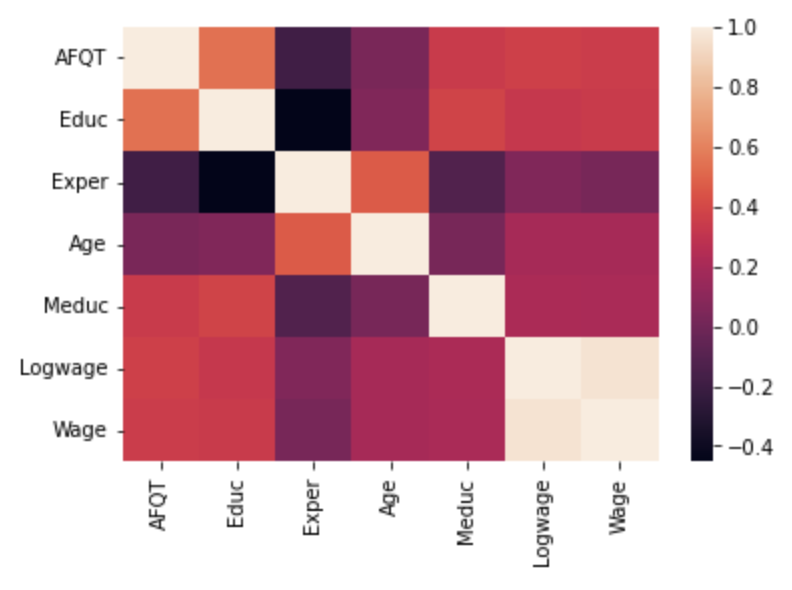

#### Step 6: Best subset and stepwise selection (interactions)

- We also created three different models to compare with our initial model for improvement.
    - Best subset selection with interaction terms: R-squared of 0.192
    - Forward stepwise selection: R-squared of 0.185
    - Backward stepwise selection: R-squared of 0.199
- Each method has their own pros and cons for developing the ideal model. Best subset selection can simplify model interpretations by identifying the most relevant variables for making predictions. The forward stepwise selection adds the variable that gives the greatest additional improvement to the fit each step. Back ward stepwise selection begins with the full least squares model containing all predictors, and then iteratively removes the least useful predictor, one-at-a-time. We decided to try all three methods to gain greater insight on which variables were significant and which interaction terms could be used to improve the fit of our model. 
- Although all 3 of our new models had very low R-squared values, we found the presence of interaction terms that were significant in multiple models.
    - There were indications of correlation between AFQT*Educ and Educ*Exper in the best subset selection with interaction terms and the backwards stepwise selection. We considered these interaction terms to develop the final model.

Model summary for best subset selection: 

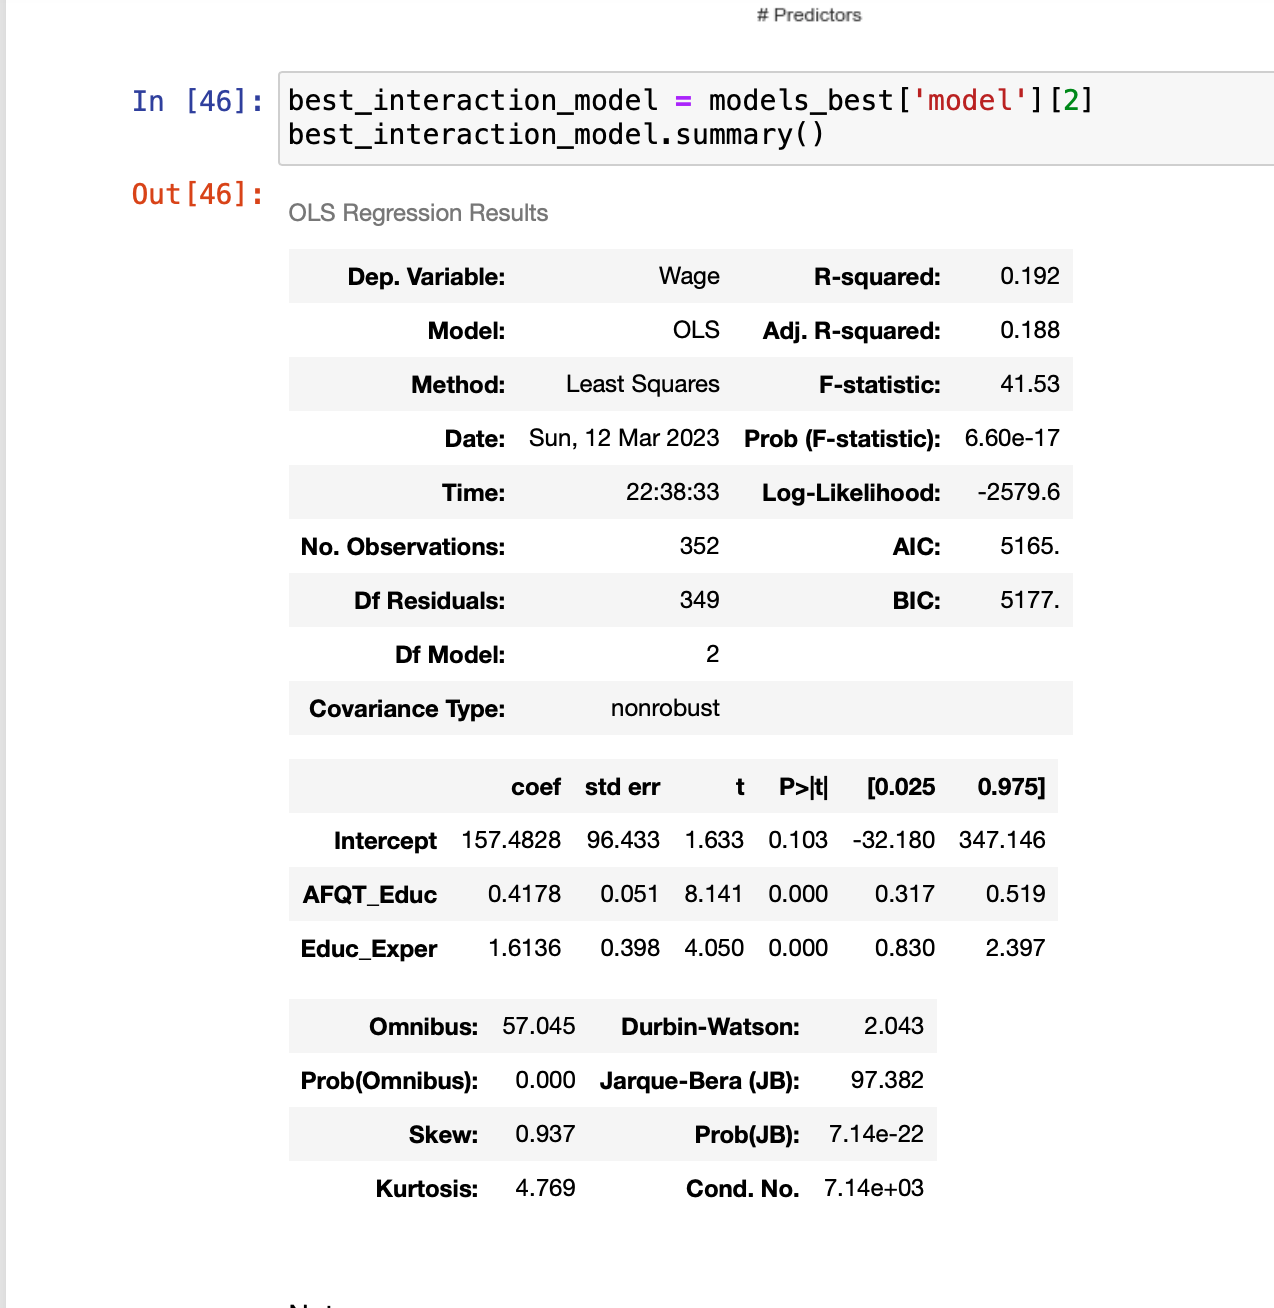

Model summary for forward stepwise: 

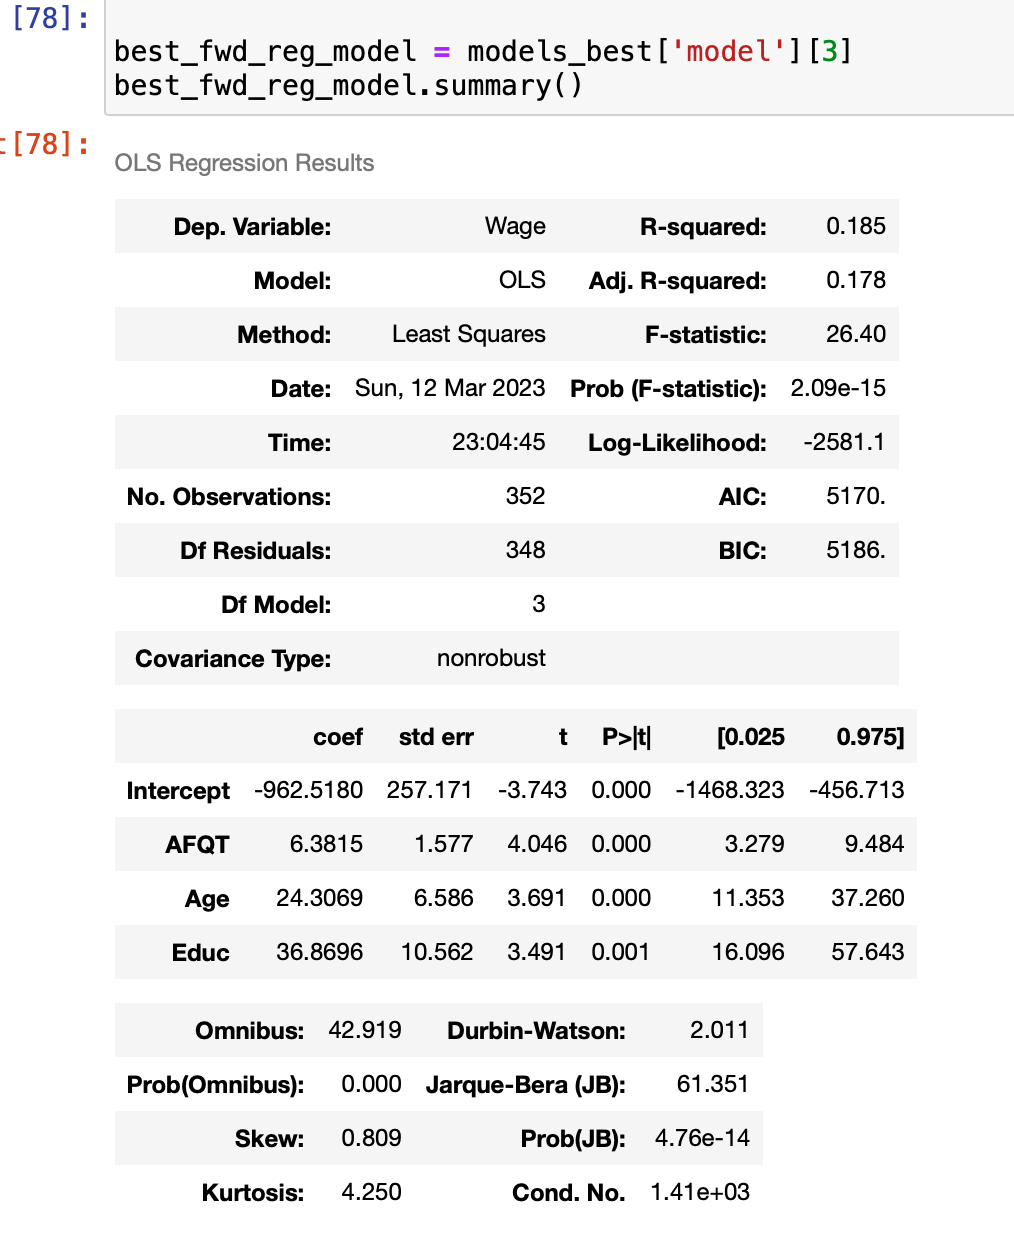

Model summary for backwards stepwise

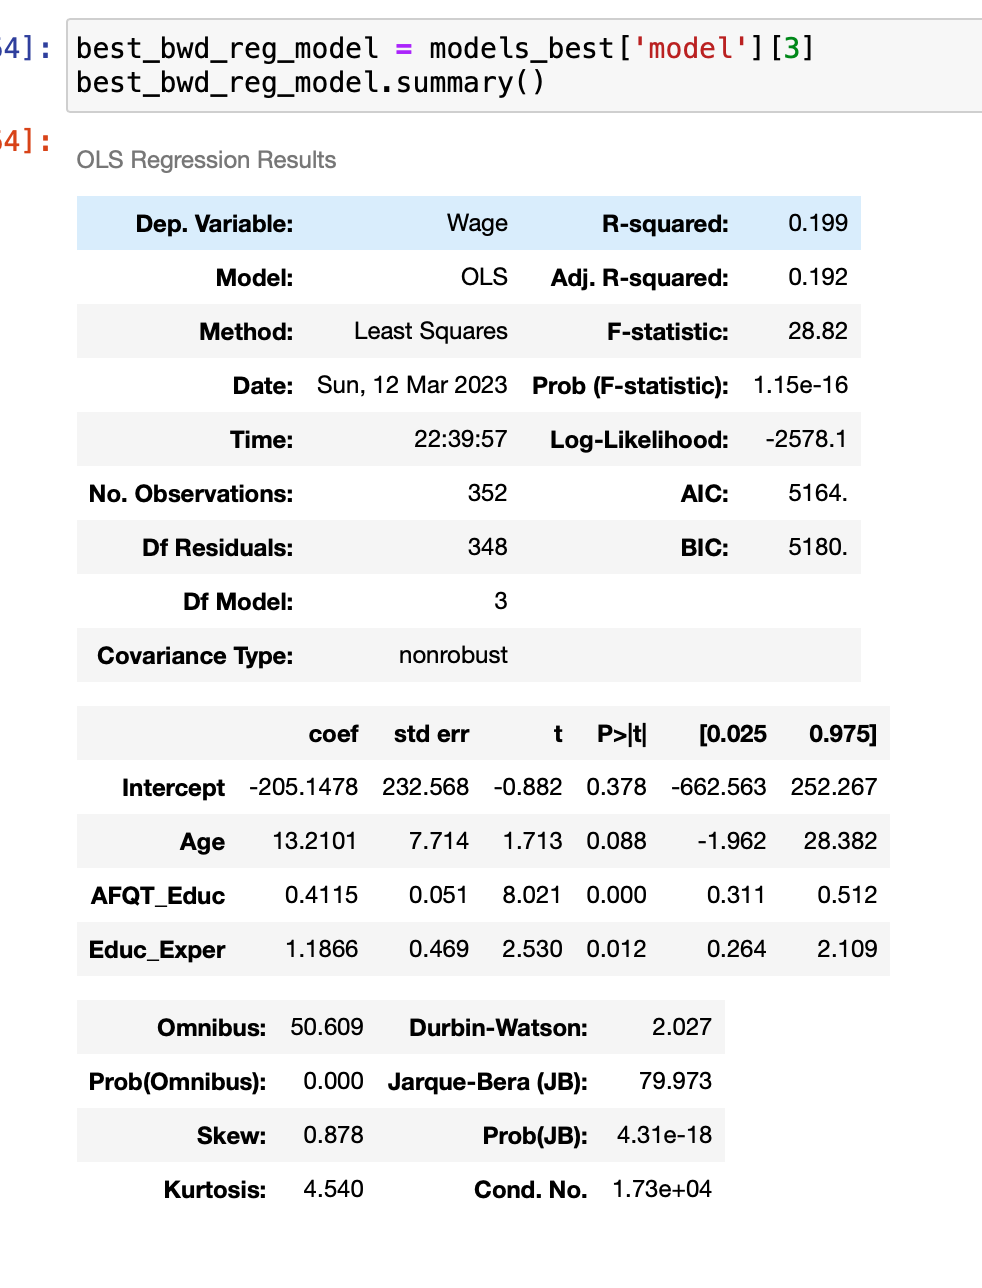

#### Step 7: Our final model

- Using the results and insights from our previous steps, we developed a final model as shown below. 
    - Final model equation
    - explain how we got final model 
        - which variables to include
        - which transformations to undertake on predictors/response
        - which interaction terms to include
    - talk about final model statistics

Logwage is the dependent variable, and there are 4 independent variables: I(AFQT ** 2), Educ, I(AFQT ** 2)*Educ, and Exper. 

The R-squared and adjusted R-squared values are both very high (0.996), indicating that the model explains a large proportion of the variation in the dependent variable. The p-values for all predictors are very low, so they are all statistically significant to logwage. 

We chose logwage as our dependent variable because Wage as a dependent variable produced a lower R-squared and some of the interaction terms were statistically insignificant. 

For our formula, the I(AFQT****2) term represents the squared value of AFQT. We included this from the initial model summary because there is a nonlinear relationship between AFQT and logwage, and AFQT is significant to logwage. We included I(AFQT****2)*Educ indicates an interaction effect between these two variables as we saw in the best subset selection with interactions and backwards selection. This means that the effect of AFQT on logwage depends on the level of Educ, and vice versa. We added Exper as a predictor because there indicates that both terms are included in the model as independent variables and because Experience is statistically significant to logwage. 

Finally, the -1 term in the formula indicates that we do not include an intercept term in the model. This is because including an intercept would imply that the expected value of Wage is non-zero when all predictor variables are zero, which may not make sense in this context.


#### Step 8: Final Model Analysis

Now that we have developed a final model, we analyzed our final model to make sure there is no further improvements needed.

1. RMSE check: 

train model: 370.1347897346834.
test model: 410.8099542822619.

RMSEs are similar - no overfitting. Also, RMSEs are low - good prediction.

2. Linear assumption: satisfied.
   Constant Variance assumption: satisfied

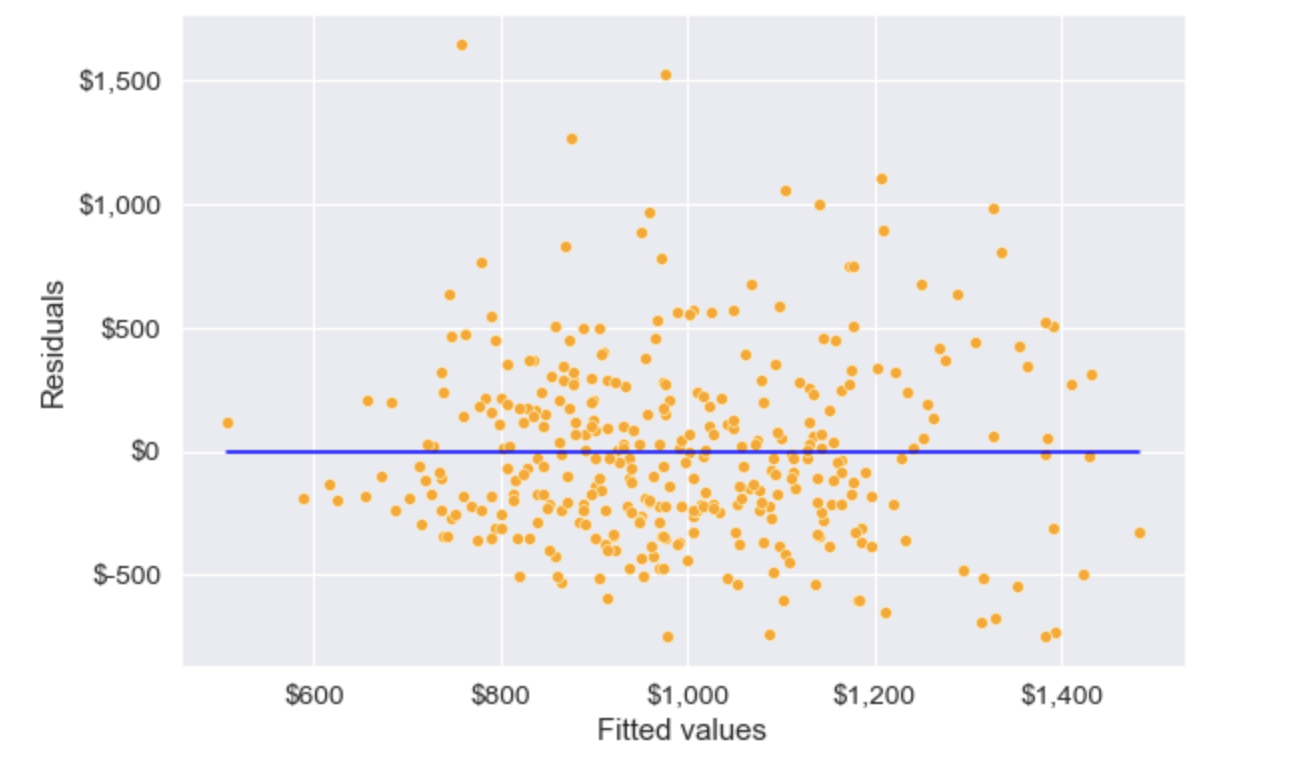

3. Errors: relatively normally distributed

4. Homoscedasticity: relatively equal variance of residuals across different levels of the predictor variable

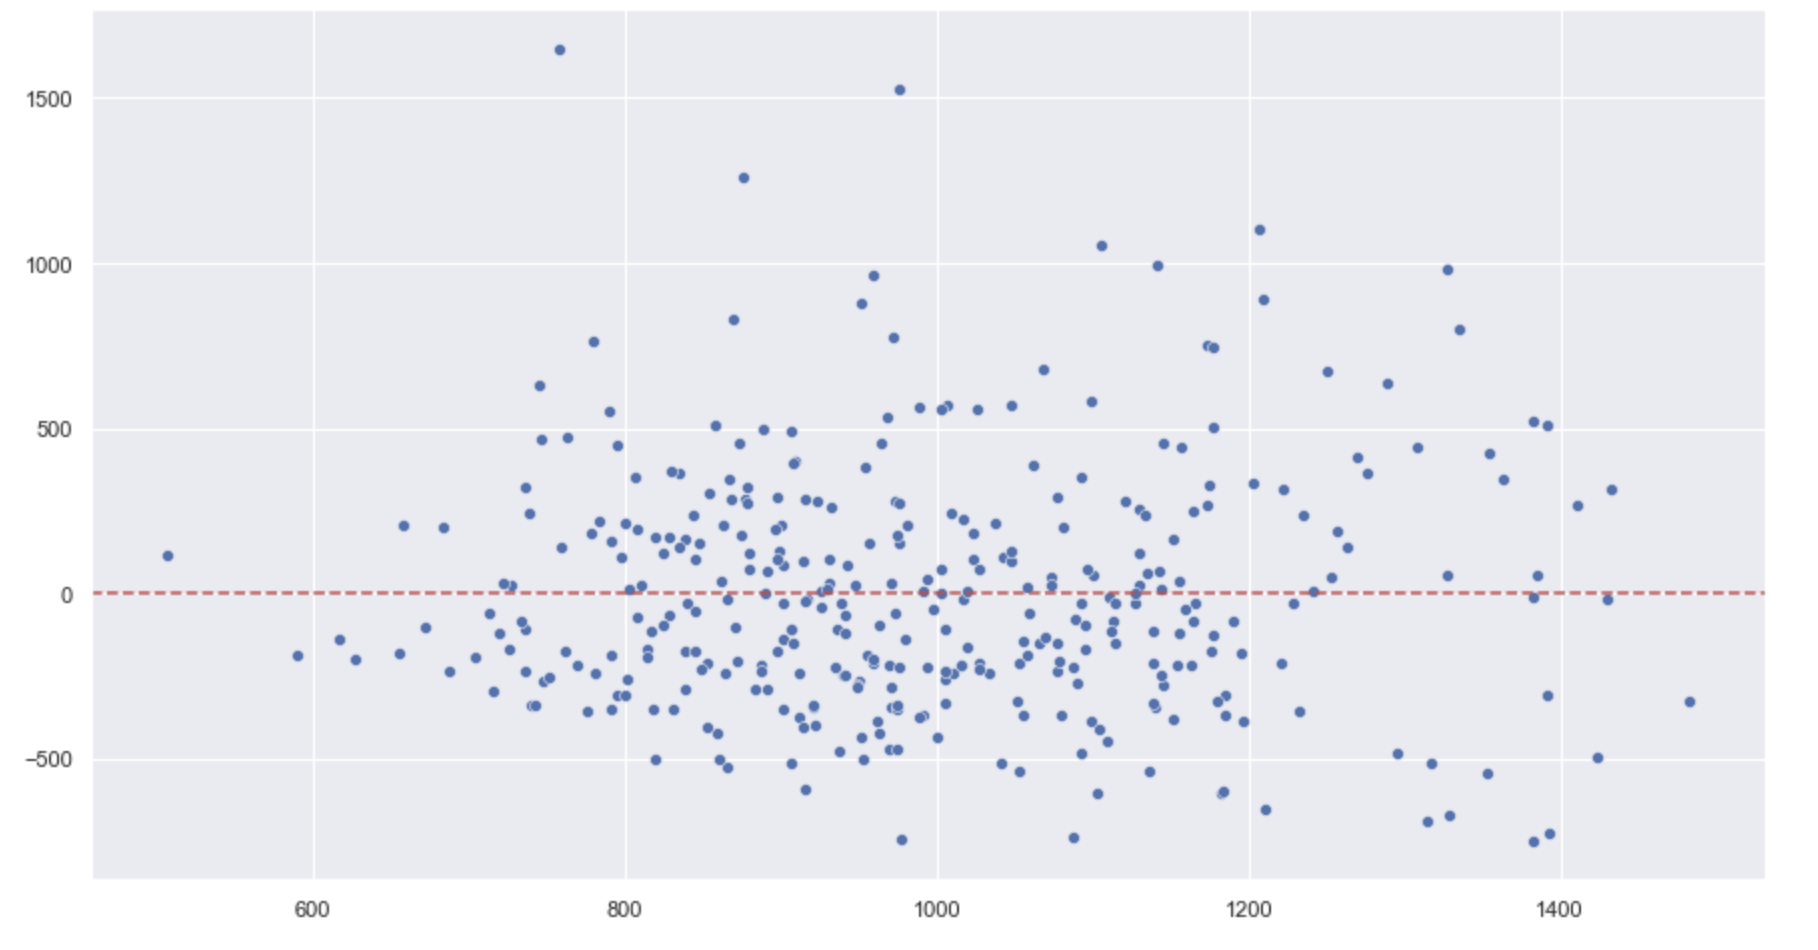

5. From the code, we can tell that there are 4 outliers, but no influencial points.

#### Did we succed in achieving our goal?

## Limitations of the model with regard to inference / prediction

If it is inference, will the inference hold for a certain period of time, for a certain subset of population, and / or for certain conditions.

If it is prediction, then will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

The prediction can be used to predict an individual's future earnings. However, situations like years of school and years of working sometimes cannot be predicted by people before getting to that stage. Our prediction only let people know if they achieve some stages, what will propabaly happen. Also, if an individual don't have any work experience or school experience, this model could be useless. 

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)


In our final model, we can conclude that years of education and work experience are two important predictors of future earning. The effect of years of education is heavier than that of work experience. The AFQT test (like an IQ test) itself doesn’t really predict the future earning. Its effect is not statistically significant, and it mean because the effect is also explained by the year of education. For legacy - mother’s years of education, it doesn’t really matter. Also, we need to re-emphasize that no effects are causal cause ths survey is not an experiment and does not imply causal effect. Effects here are simply showing relationships.

Our analysis can create values for stakeholders.

As long as the current school and job market are not strikingly changed, our predictions could always be useful. 

For families, when the kid desires to find a way to earn more in the future, simply try to spend more years in school. If not, don’t panic, experiences in workplace can also contribute to the future earning.

For employers, high correlation between AFQT and Educ means that if hiring smarter employees is the main goal and it is hard to measure the intelligence of a candidate, it is easier to simply hire employees with higher level education.

For government, the state should create more opportunities for kids to get higher level education, especially for those with lower income. It is a way to provide mobility opportunities for lower income families and could definitely improve equality in the society and provide positive externalities to the society, which would definitely benefit the world.

However, the limitation is the linear prediction doesn't imply the causal effect, so there is a chance that maybe education is not the real reason behinds earnings and success.

## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

https://github.com/alandaz/DataScienceRepo

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Alanda Zong</td>
    <td>Stepwise Selection code and final model analysis</td>
    <td>Best subset selection, best subset selection with interaction terms, forward stepwise, backwards stepwise, and wrote the code for the graphs of the final model analysis (errors, homoscedasticity, and residual scatter plot) </td>
    <td>5</td>
  </tr>
  <tr>
    <td>Junho Park</td>
    <td>Assumptions and interactions</td>
    <td>Checked and addressed modeling assumptions and identified relevant variable interactions. Checked for outliers and influential points in the model. </td>
    <td>15</td>
  </tr>
    <tr>
    <td>Sankaranarayanan Balasubramanian</td>
    <td>Outlier and influential points treatment</td>
    <td>Identified outliers/influential points and analayzed their effect on the model.</td>
    <td>130</td>    
  </tr>
    <tr>
    <td>Diqiao Wang</td>
    <td>Data selection, Colinearity Check, and Final Model Analysis</td>
    <td>Selected the clean data set that is suitable for running regression on, checked the VIF part, and ran the final model assumption.</td>
    <td>11</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

At first, I personally feel Github was hard to use because it required so many steps to make some changes to the codes compared to simply writing codes on Jupyter Notebook. I felt it was hard to manage different versions and I did not know how to store the original version of the file besides creating a copy of that. However, when it comes to the final report step, Github's magic appears. Last quarter, our group had to work on one computer to run every piece of codes and that progress was time-consuming. But this quarter, every group number is able to see what is going on easily through Github although we are not sitting together physically.

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.